# Notebook for viewing the training losses of the two GAN models

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

### AD subjects

Read the files containing the losses for the GAN trained on the AD subset.

In [2]:
def get_losses(file):
    loss_list = []
    for x in file:
        loss_list.append(float(x))
    return loss_list

d_fake_path = 'ad/disc_fake_average.txt'
d_fake_file = open(d_fake_path, 'r')
d_fake_loss = get_losses(d_fake_file)

d_real_path = 'ad/disc_real_average.txt'
d_real_file = open(d_real_path, 'r')
d_real_loss = get_losses(d_real_file)

g_path ='ad/gen.txt'
g_file = open(g_path, 'r')
g_loss = get_losses(g_file)

We have 3 files in total, the first two are the discriminator losses, while the second is the generator's loss.

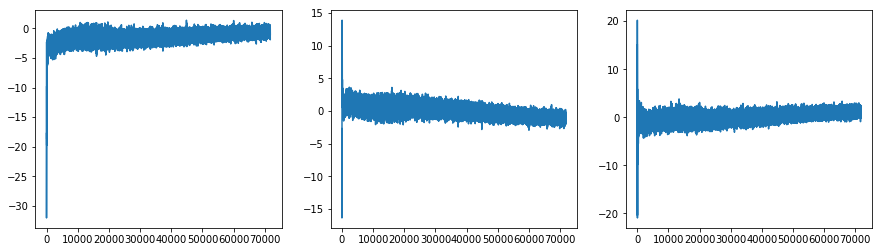

In [3]:
plt.figure(figsize=(15,4))

ax = plt.subplot(131)
ax.plot(d_fake_loss)

ax = plt.subplot(132)
ax.plot(d_real_loss)

ax = plt.subplot(133)
ax.plot(g_loss)

Calculate the discriminator's loss by subtracting the loss for the *fake* images from the loss for the *real* images.

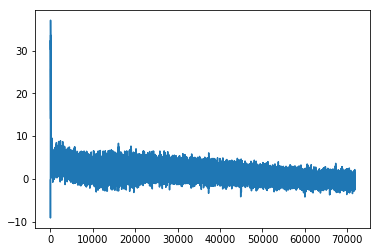

In [4]:
d_loss = []
for real, fake in zip(d_real_loss, d_fake_loss):
    d_loss.append(real - fake)
    
plt.plot(d_loss)

Calculate the average loss for each batch for both the discriminator and the generator.

400
400


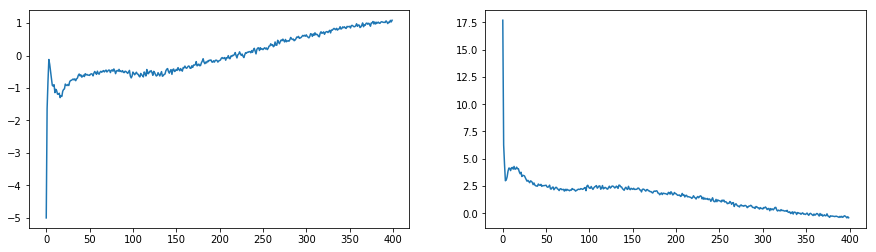

In [5]:
epochs = 400
batches = 178 # 179 + 1 for 'NC' subjects, 177 + 1 for 'AD' subjects

g_avg = []
for i in range(epochs):
    g_avg.append(np.mean(g_loss[i * batches:(i + 1) * batches]))
print(len(g_avg))

d_avg = []
for i in range(epochs):
    d_avg.append(np.mean(d_loss[i * batches:(i + 1) * batches]))
print(len(d_avg))

plt.figure(figsize=(15,4))

ax = plt.subplot(121)
ax.plot(g_avg)

ax = plt.subplot(122)
ax.plot(d_avg)

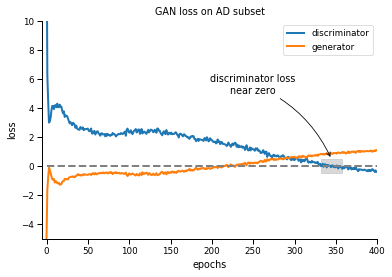

In [6]:
sns.set_context('paper')

cp = sns.color_palette()
c1 = cp[0]
c2 = cp[1]

ax = plt.subplot(111)

ax.plot(d_avg, c=c1, lw=2, label='discriminator')
ax.plot(g_avg, c=c2, lw=2, label='generator')

ax.plot([0, len(d_avg)], [0, 0], c='0.5', lw=2, ls='--')

#ax.plot([332, 332], [-1, 1], c='0.5', ls='--')
#ax.plot([357, 357], [-1, 1], c='0.5', ls='--')

r = matplotlib.patches.Rectangle([332, -0.5], 357-332, 1, color='0.5', alpha=0.3)
ax.add_artist(r)

ax.annotate('discriminator loss\nnear zero', horizontalalignment='center',
             xy=((357-332)/2 + 332, 0.5), xycoords='data', xytext=(250, +5),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim([-5, len(d_avg)])
ax.set_ylim([-5, 10])

ax.set_title('GAN loss on AD subset')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')

ax.legend(loc='upper right')

plt.savefig('figures/ad_loss.png', bbox_inches='tight')

### NC subjects

Same thing for the NC subset.

In [7]:
d_fake_path = 'nc/disc_fake_average.txt'
d_fake_file = open(d_fake_path, 'r')
d_fake_loss = get_losses(d_fake_file)

d_real_path = 'nc/disc_real_average.txt'
d_real_file = open(d_real_path, 'r')
d_real_loss = get_losses(d_real_file)

g_path ='nc/gen.txt'
g_file = open(g_path, 'r')
g_loss = get_losses(g_file)

d_loss = []
for real, fake in zip(d_real_loss, d_fake_loss):
    d_loss.append(real - fake)

epochs = 600
batches = 180 # 179 + 1 gia normal, 177 + 1 gia ad

g_avg = []
for i in range(epochs):
    g_avg.append(np.mean(g_loss[i*batches:(i + 1)*batches]))
print(len(g_avg))

d_avg = []
for i in range(epochs):
    d_avg.append(np.mean(d_loss[i*batches:(i + 1)*batches]))
print(len(d_avg))

600
600


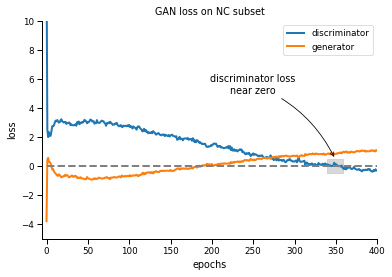

In [8]:
sns.set_context('paper')

ax = plt.subplot(111)

d_avg = d_avg[:400]
g_avg = g_avg[:400]

ax.plot(d_avg, c=c1, lw=2, label='discriminator')
ax.plot(g_avg, c=c2, lw=2, label='generator')

ax.plot([0, len(d_avg)], [0, 0], c='0.5', lw=2, ls='--')

#ax.plot([332, 332], [-1, 1], c='0.5', ls='--')
#ax.plot([357, 357], [-1, 1], c='0.5', ls='--')

r = matplotlib.patches.Rectangle([339, -0.5], 359-339, 1, color='0.5', alpha=0.3)
ax.add_artist(r)

ax.annotate('discriminator loss\nnear zero', horizontalalignment='center',
             xy=((359-339)/2 + 339, 0.5), xycoords='data', xytext=(250, +5),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim([-5, len(d_avg)])
ax.set_ylim([-5, 10])

ax.set_title('GAN loss on NC subset')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')

ax.legend(loc='upper right')

plt.savefig('figures/nc_loss.png', bbox_inches='tight')